In [ ]:
import numpy as np
import csv

def fundraiser_analysis(filename1_students, filename2_saleinfo): # impt to encapsulate in wrapper fxn for code portability to basketball team and robotics squad
  students = {}
  with open(filename1_students, mode='r') as input_file:
      reader = csv.DictReader(input_file)

      for row in reader:
          # inserts student name as key and instrument (index 1) as dict value
          students[row[reader.fieldnames[0]]] = row[reader.fieldnames[1]]

  sales = {}
  with open(filename2_saleinfo, mode='r') as input_file:
      reader = csv.DictReader(input_file)
      for row in reader:
          student = row['\ufeffstudent'] # funky column title formatting here, make sure the robotics squad uses this titling when making their csv files!
          sale = row['sale'].strip()

          # basically inserting sale of popcorn or donation as item in list as value of dict, creating new key/value-list otherwise
          if student in sales:
              sales[student].append(sale)
          else:
              sales[student] = [sale]

  #1 - how many bags of popcorn did the band sell?
  total_popcorn_bags = 0

  for value_sales_list in sales.values():
      for sale in value_sales_list:
          if "bags of popcorn" in sale:
              # this calculates number of popcorn bags sold by parsing list-values in dict for given text
              num_bags = int(sale.split()[0]) # impt to note that csv entries need to have bag_num as first value (index 0)
              total_popcorn_bags += num_bags # addes typcasted int value of first char in list-value of dict to total count

  print(f'{total_popcorn_bags} bags of popcorn were sold\n')

  #2 - General question of how well the band do at fundraising

  # average sale (A):
  popcorn_sales = []

  for value_sales_list in sales.values():
      for sale in value_sales_list:
          if "bags of popcorn" in sale:
              # applies same extraction logic for popcorn bags sold here as above
              num_bags = int(sale.split()[0])
              popcorn_sales.append(num_bags * 3) # this math here accounts for each popcorn unit being $3
              # if I can scale the number of bags by 3, it'll represent the amount of money created by the sale of that many bags

  array_of_popcorn_sales = np.array(popcorn_sales) # creates numpy array out of popcorn revenue
  popcorn_sale_avg = np.mean(array_of_popcorn_sales) # uses numpy mean function to find average popcorn revenue within a single instance
  print(f'Average Sale: ${popcorn_sale_avg:.2f}')

  # average donation (B):
  donations = []

  for value_sales_list in sales.values():
      for sale in value_sales_list:
          if "$" in sale: # applies same logic above parsing popcorn bags except instead for csv cells with donations made
              donation_amount = float(sale.replace("$", "").strip()) # impt to cast to float to maintain fractional portion of donation
              donations.append(donation_amount) # list insertion for taking average

  donations_array = np.array(donations) # numpy array for array of all instances of donations
  donate_avg = np.mean(donations_array)
  print(f'Average Donation: ${donate_avg:.2f}')

  # total amt raised popcorn (C):
  popcorn_sales_total = np.sum(array_of_popcorn_sales) # uses numpy sum function to add all elements of numpy array
  print(f'Total Popcorn Profit: ${popcorn_sales_total:.2f}')

  # total amt raised donations (D):
  total_donations = np.sum(donations_array) # same as above for total donated for fundraiser (sum function)
  print(f'Total Donations: ${total_donations:.2f}')

  # total amount generally raised (E):
  fundraising_total = popcorn_sales_total + total_donations # adds respective totals for donations and popcorn
  print(f'Total $ Raised: ${fundraising_total:.2f}')

  #3 - total sales by instrument

  # question 3 instructions don't specify whether total sales implies actual selling of popcorn bags or also donations given to the student
  # implementation assumes question parameters are for money broadly obtained through popcorn and donations for each instrument

  instruments = sorted(set(students.values()))  # creates set of instruments from students dict by appending only unique values
  index_of_instruments = {instrument: idx for idx, instrument in enumerate(instruments)} # creates tuple quantities with a created index for each instrument and the instrument itself (enumerate fxn)
  student_list_sorted = sorted(students.keys()) # sorts list of students that correspond to instruments
  sales_matrix = np.zeros((len(student_list_sorted), len(instruments))) # initializes matrix of all 0s instruments in relation to sales (np.zeroes fxn)

  for student_key, student in enumerate(student_list_sorted): # enumerate again creates indexing for students that initially wasn't there bc it was taken from dict (inherently unsorted)
      student_sales = sales.get(student, [])
      total_student_sales = 0

      for sale in student_sales:
          if "bags of popcorn" in sale:
              num_bags = int(sale.split()[0]) # accesses value of popcorn bags sold
              total_student_sales += num_bags * 3  # $3/bag
          elif "$" in sale:
              donation_amount = float(sale.replace("$", "").strip())
              total_student_sales += donation_amount

      instrument = students.get(student) # populates 2d matrix with given instrument of value of student from students dict
      if instrument:
          instrument_col_id = index_of_instruments[instrument]
          sales_matrix[student_key, instrument_col_id] = total_student_sales # append value of sale to matrix cell corresponding to given instrument

  instrument_total_sales = np.sum(sales_matrix, axis=0) # addes all total sales per specific instrument
  print("\nSales by instrument:")
  for instrument, total_sales in zip(instruments, instrument_total_sales): # zip fxn allows for loop to match indices in instruments and total_sales lists and print as tuple "pair" quantity
  # removing need for multiple for loops ~ GeeksforGeeks "Zip() in Python"
      print(f"{instrument}: ${total_sales:.2f}")

  #4 - instrument raising the most money
  instrument_sale_avg = np.mean(sales_matrix, axis=0) # performing mean across rows, meaning an average for elements within each column (moving down each row vertically), thus 0axis

  sorted_indices = np.argsort(instrument_sale_avg)[::-1] # argsort fxn takes average sales and reverses sorted order (:-1)
  sorted_instruments = [instruments[idx] for idx in sorted_indices] # taking instrument keys of index list and putting in separate list
  avg_sales_sorted = [instrument_sale_avg[idx] for idx in sorted_indices] # creates separate list of average sales for second part of tuple

  print("\nInstruments ordered by most money raised (by average money raised per person):")
  for instrument, avg_sales in zip(sorted_instruments, avg_sales_sorted): # zip fxn once again to output elements at matching index of two lists as singular tuple
      print(f"{instrument}: ${avg_sales:.2f}")

  #5 - top 3 fundraisers
  student_fundraising_totals = {}

  for student_key, student in enumerate(student_list_sorted):
      student_sales = sales.get(student, []) # similar logic as above allocating student and possible amount raised (total_student_sales)
      total_student_sales = 0

      for sale in student_sales:
          if "bags of popcorn" in sale: # parsing between donations and products sold for fundraiser
              num_bags = int(sale.split()[0])
              total_student_sales += num_bags * 3
          elif "$" in sale:
              donation_amount = float(sale.replace("$", "").strip())
              total_student_sales += donation_amount # if-elif logic to add amt of money from both popcorn and donations

      student_fundraising_totals[student] = total_student_sales # list insertion as value for student key
  sorted_students = sorted(student_fundraising_totals.items(), key=lambda x: x[1], reverse=True)
  # uses sorted function to sort dict entries in reverse order (last param arg being True)
  # lambda fxn is essentially a shortform typescript function saying to pass in x (some element or argument, in this case the tuple of the dict key&value) and sort based on
  # the second element in that tuple, in this case the amt raised

  print("\nThree students that raised the most money:")
  for student, total_raised in sorted_students[:3]: # essentially substringing the list up to but excluding index 3, so first three elements
      print(f"{student}: ${total_raised:.2f}")

filename1_students_instruments = 'names _1_.csv'
filename2_sales_donations = 'sales _1_.csv'
fundraiser_analysis(filename1_students_instruments, filename2_sales_donations)

# function invocations above for portability to other teams and clubs at the middle school with changeable filename parameters


299 bags of popcorn were sold

Average Sale: $9.44
Average Donation: $21.97
Total Popcorn Profit: $897.00
Total Donations: $1692.00
Total $ Raised: $2589.00

Sales by instrument:
bassoon: $147.00
clarinet: $237.00
flute: $228.00
french horn: $181.00
oboe: $127.00
percussion: $503.00
saxaphone: $400.00
trombone: $231.00
trumpet: $351.00
tuba: $184.00

Instruments ordered by most money raised (by average money raised per person):
percussion: $10.06
saxaphone: $8.00
trumpet: $7.02
clarinet: $4.74
trombone: $4.62
flute: $4.56
tuba: $3.68
french horn: $3.62
bassoon: $2.94
oboe: $2.54

Three students that raised the most money:
Ping: $142.00
Declan: $125.00
Madison: $116.00


Mean Height: 179.74 cm
Median Height: 182.00 cm
Standard Deviation: 6.93 cm
Min Height: 163 cm, Max Height: 193 cm
25th Percentile: 174.25 cm, 50th Percentile: 182.0 cm, 75th Percentile: 183.0 cm


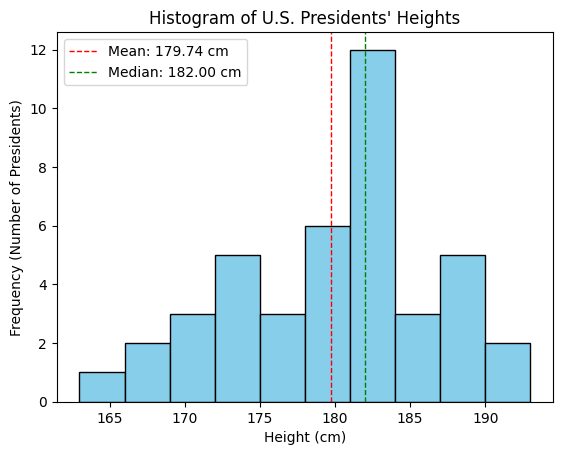

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# with open block to read in csv
heights = [] # clarified in class that we wouldnt have to use some numpy specific fxn to read in the file
with open('president_heights.csv', 'r') as input_file:
    next(input_file) # skips header row b/c of column labels
    for line in input_file:
        parts = line.strip().split(',')  # Split the line by commas
        heights.append(int(parts[2]))  # Append the height (convert to float)

# convert to numpy array for simple computations/operations
heights_array = np.array(heights)

# applies numpy specific operations for summary statistics
mean_height = np.mean(heights_array)
median_height = np.median(heights_array)
std_dev_height = np.std(heights_array)
min_height = np.min(heights_array)
max_height = np.max(heights_array)

print(f"Mean Height: {mean_height:.2f} cm")
print(f"Median Height: {median_height:.2f} cm")
print(f"Standard Deviation: {std_dev_height:.2f} cm")
print(f"Min Height: {min_height} cm, Max Height: {max_height} cm")

plt.hist(heights_array, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of U.S. Presidents\' Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency (Number of Presidents)')
plt.axvline(mean_height, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_height:.2f} cm')
plt.axvline(median_height, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_height:.2f} cm')
# implements dashed mean and median lines on histogram to reflect numpy summarization
plt.legend()
plt.show()

